In [4]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import scipy
import scipy.misc
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [ ]:
# Initialization
dataDir='/data/public/MSCOCO'
dataType='train2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir, dataType)
# initialize COCO api for instance annotations
coco=COCO(annFile)

In [12]:
# Get a person image from the dataset.
catIds = coco.getCatIds(catNms=['person']);
imgIds = coco.getImgIds(catIds=catIds );
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
I = io.imread(img['coco_url'])
I_original = I
plt.axis('off')
plt.imshow(I)
plt.show()

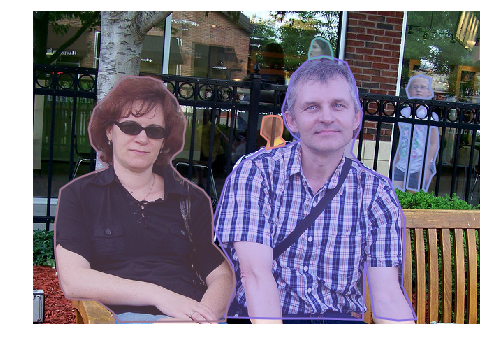

In [14]:
# Show the segmentation
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

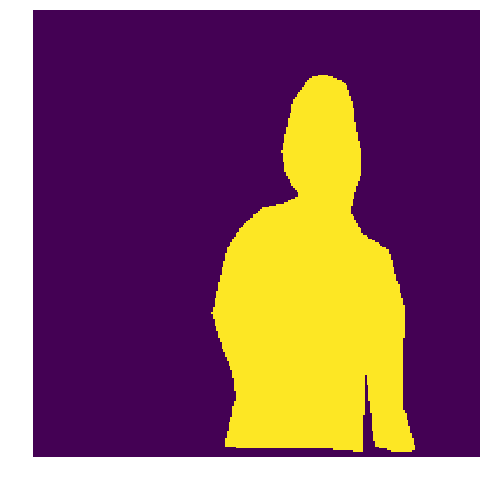

In [17]:
# Show the mask
mask = coco.annToMask(anns[0])
plt.axis('off')
mask = scipy.misc.imresize(mask,[256,256])
plt.axis('off')
plt.imshow(mask)
plt.show()

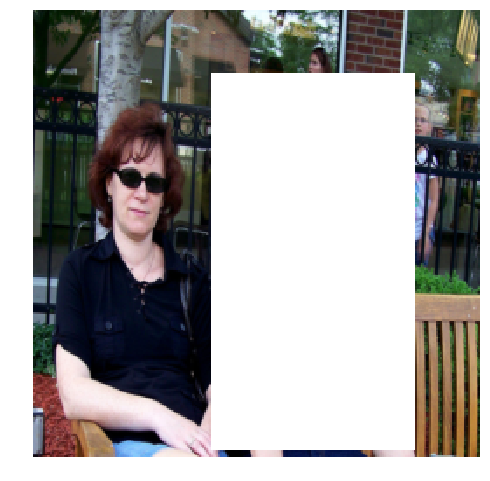

In [19]:
# Resize the image and bounding box to 256x256
I = io.imread(img['coco_url'])
I_resize = scipy.misc.imresize(I,[256,256])
bbox = anns[0]['bbox']
width = I.shape[1]
height = I.shape[0]
bbox[0] = bbox[0]*256/width
bbox[1] = bbox[1]*256/height
bbox[2] = bbox[2]*256/width
bbox[3] = bbox[3]*256/height
bbox = [int(i) for i in bbox]
I = I_resize
I[bbox[1]:bbox[1]+bbox[3],bbox[0]:bbox[0]+bbox[2],:]=255
plt.axis('off')
plt.imshow(I)
plt.show()

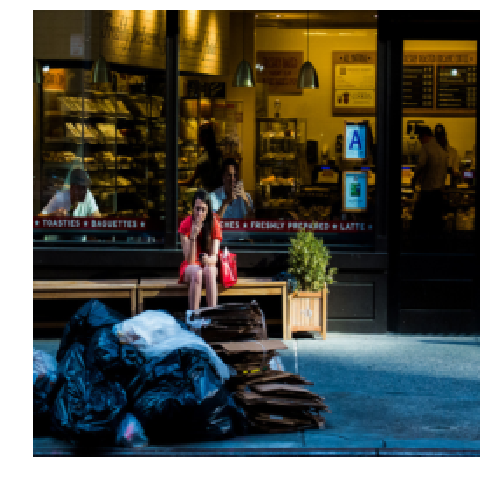

In [20]:
# Get another random image from images.
imgIds_all = coco.getImgIds(catIds=[], imgIds=[]);
img_rd = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
I_rd = io.imread(img_rd['coco_url'])
# resize it to 256x256
I_rd = scipy.misc.imresize(I_rd,[256,256])
plt.axis('off')
plt.imshow(I_rd)
plt.show()

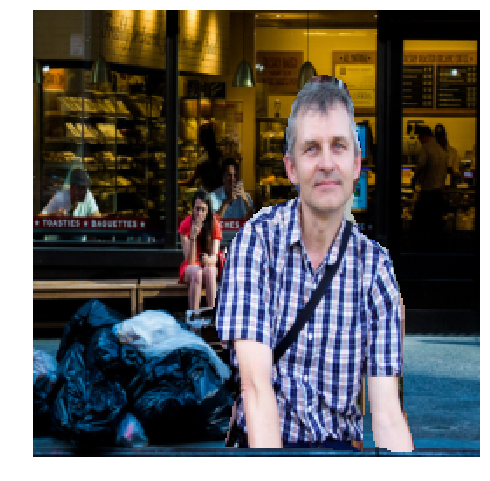

In [23]:
# Combine these two images together:
# bbox: (x, y, width, height)
loc_x = np.random.randint(0,256-bbox[2]-1)
loc_y = np.random.randint(0,256-bbox[3]-1)
mask_rep=np.tile(mask[:,:,np.newaxis],(1,1,3))
I_original_resize = scipy.misc.imresize(I_original,[256,256])
res = mask_rep*I_original_resize + (1-mask_rep)*I_rd
plt.axis('off')
plt.imshow(res)
plt.show()